In [4]:
#!pip install tensorflow --upgrade

In [5]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
#print(tf.__version__)

In [6]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [7]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [8]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [9]:
X_train = train_images.reshape(len(train_images),28,28,1)
y_train = train_labels.reshape(len(train_labels),1)

X_test = test_images.reshape(len(test_images),28,28,1)
y_test = test_labels.reshape(len(test_labels),1)

In [10]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(60000, 1)
(10000, 28, 28, 1)
(10000, 1)


In [11]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [12]:
X_train_flat = X_train.reshape(X_train.shape[0], -1).astype(np.float32)
X_test_flat = X_test.reshape(X_test.shape[0], -1).astype(np.float32)

# Normalize the data
X_train_flat /= 255.0
X_test_flat /= 255.0

# Compute the covariance matrix
#cov_matrix = np.cov(X_train_flat)

#print("Covariance matrix shape:", cov_matrix.shape)
#print("Covariance matrix:\n", cov_matrix)


In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Input, GlobalAveragePooling2D
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy

In [14]:
from keras.utils import to_categorical
num_classes = 10
y_train = to_categorical(train_labels, num_classes)
y_test = to_categorical(test_labels, num_classes)

print(X_test.shape)  
print(y_test.shape)  

(10000, 28, 28, 1)
(10000, 10)


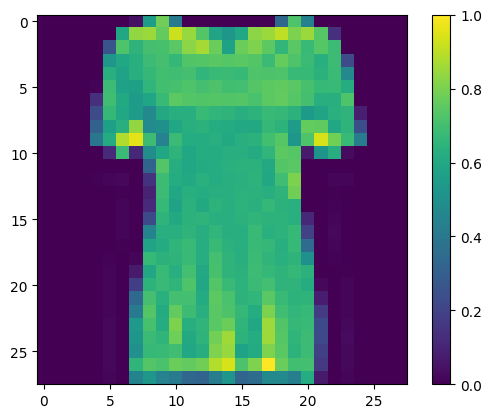

In [15]:
plt.figure()
plt.imshow(X_train[10])
plt.colorbar()
plt.grid(False)
plt.show()

In [16]:
#precision and recall

import numpy as np
import tensorflow as tf
from tensorflow.keras.metrics import Precision, Recall

def calculate_precision_recall(model, X_test, y_test):
    y_pred_logits = model.predict(X_test, verbose=0)
    y_pred = np.argmax(y_pred_logits, axis=-1)
    
    precision_metric = Precision()
    recall_metric = Recall()

    precision_metric.update_state(y_test, y_pred)
    recall_metric.update_state(y_test, y_pred)
    
    precision = precision_metric.result().numpy()
    recall = recall_metric.result().numpy()
    
    return precision, recall

In [17]:
#General CNN

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.metrics import Precision, Recall

(X_train, y_train), (X_test, y_test) = datasets.fashion_mnist.load_data()
X_train = X_train.reshape((60000, 28, 28, 1)).astype('float32') / 255
X_test = X_test.reshape((10000, 28, 28, 1)).astype('float32') / 255

def general_cnn():
    model_general_cnn = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10)
    ])
    return model_general_cnn

model_general_cnn = general_cnn()
model_general_cnn.compile(optimizer=Adam(learning_rate=0.0001), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

model_general_cnn.fit(X_train, y_train,epochs=10,validation_data=(X_test, y_test))
test_loss_gcnn, test_acc_gcnn = model_general_cnn.evaluate(X_test, y_test, verbose=2)
precision_gcnn, recall_gcnn = calculate_precision_recall(model_general_cnn, X_test, y_test)
print(f"Test accuracy: {test_acc_gcnn}")

Epoch 1/10


/Users/ishikamanghwani/Desktop/cnn_rp/LiteNetCNN/.venv/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.6553 - loss: 1.0440 - val_accuracy: 0.8151 - val_loss: 0.5115
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8260 - loss: 0.4773 - val_accuracy: 0.8257 - val_loss: 0.4695
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8479 - loss: 0.4261 - val_accuracy: 0.8460 - val_loss: 0.4255
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.8624 - loss: 0.3905 - val_accuracy: 0.8627 - val_loss: 0.3875
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.8690 - loss: 0.3687 - val_accuracy: 0.8596 - val_loss: 0.3812
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.8772 - loss: 0.3436 - val_accuracy: 0.8764 - val_loss: 0.3536
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8867 - loss: 0.3221 - val_accuracy: 0.8760 - val_loss: 0.3469
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8865 - loss: 0.3163 - val

In [18]:
model_general_cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 365,792 (1.40 MB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 243,862 (952.59 KB)

In [19]:
#AlexNet

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Precision, Recall

(X_train, y_train), (X_test, y_test) = datasets.fashion_mnist.load_data()
X_train = X_train.reshape((60000, 28, 28, 1)).astype('float32') / 255
X_test = X_test.reshape((10000, 28, 28, 1)).astype('float32') / 255

def alexnet():
    model_alexnet = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.Dense(256, activation='relu'),
        layers.Dense(10)
    ])
    return model_alexnet

model_alexnet = alexnet()
model_alexnet.compile(optimizer=Adam(learning_rate=0.0001), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
print(model_alexnet.summary())
model_alexnet.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

test_loss_alexnet, test_acc_alexnet = model_alexnet.evaluate(X_test, y_test, verbose=2)
precision_alexnet, recall_alexnet = calculate_precision_recall(model_alexnet, X_test, y_test)
print(f"Test accuracy: {test_acc_alexnet}")


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 194,058 (758.04 KB)

 Trainable params: 194,058 (758.04 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.6169 - loss: 1.1438 - val_accuracy: 0.7802 - val_loss: 0.6104
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7925 - loss: 0.5634 - val_accuracy: 0.7991 - val_loss: 0.5487
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.8211 - loss: 0.4888 - val_accuracy: 0.8199 - val_loss: 0.4917
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.8395 - loss: 0.4422 - val_accuracy: 0.8401 - val_loss: 0.4382
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.8496 - loss: 0.4133 - val_accuracy: 0.8480 - val_loss: 0.4241
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.8599 - loss: 0.3861 - val_accuracy: 0.8552 - val_loss: 0.4039
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.8656 - loss: 0.3725 - val_accuracy: 0.8625 - val_loss: 0.3747
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.8703 - lo

In [20]:
#LeNet

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Precision, Recall

(X_train, y_train), (X_test, y_test) = datasets.fashion_mnist.load_data()
X_train = X_train.reshape((60000, 28, 28, 1)).astype('float32') / 255
X_test = X_test.reshape((10000, 28, 28, 1)).astype('float32') / 255

def lenet():
    model_lenet = models.Sequential([
        layers.Conv2D(6, (5, 5), activation='relu', input_shape=(28, 28, 1)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(16, (5, 5), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(120, activation='relu'),
        layers.Dense(84, activation='relu'),
        layers.Dense(10)
    ])
    return model_lenet

model_lenet = lenet()
model_lenet.compile(optimizer=Adam(learning_rate=0.0001), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
print(model_lenet.summary())
model_lenet.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

test_loss_lenet, test_acc_lenet = model_lenet.evaluate(X_test, y_test, verbose=2)
precision_lenet, recall_lenet = calculate_precision_recall(model_lenet, X_test, y_test)
print(f"Test accuracy: {test_acc_lenet}")


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 24, 24, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 12, 12, 6)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 8, 8, 16)       │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 4, 4, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 120)            │        30,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,426 (173.54 KB)

 Trainable params: 44,426 (173.54 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.5848 - loss: 1.2712 - val_accuracy: 0.7691 - val_loss: 0.6183
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7799 - loss: 0.5865 - val_accuracy: 0.7868 - val_loss: 0.5662
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8083 - loss: 0.5210 - val_accuracy: 0.8104 - val_loss: 0.5184
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8238 - loss: 0.4880 - val_accuracy: 0.8168 - val_loss: 0.4978
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8336 - loss: 0.4647 - val_accuracy: 0.8268 - val_loss: 0.4691
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8437 - loss: 0.4382 - val_accuracy: 0.8444 - val_loss: 0.4361
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8519 - loss: 0.4188 - val_accuracy: 0.8494 - val_loss: 0.4202
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8552 - loss: 0.40

In [21]:
#ResNet

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Precision, Recall

(X_train, y_train), (X_test, y_test) = datasets.fashion_mnist.load_data()
X_train = X_train.reshape((60000, 28, 28, 1)).astype('float32') / 255
X_test = X_test.reshape((10000, 28, 28, 1)).astype('float32') / 255

def resnet_block(inputs, filters, kernel_size, strides=1):
    x = layers.Conv2D(filters, kernel_size, strides=strides, padding='same')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    
    x = layers.Conv2D(filters, kernel_size, strides=1, padding='same')(x)
    x = layers.BatchNormalization()(x)
    
    if strides != 1:
        inputs = layers.Conv2D(filters, (1, 1), strides=strides, padding='same')(inputs)
        inputs = layers.BatchNormalization()(inputs)
    
    x = layers.add([x, inputs])
    x = layers.ReLU()(x)
    return x

def resnet():
    inputs = layers.Input(shape=(28, 28, 1))
    x = layers.Conv2D(32, (3, 3), strides=1, padding='same')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    x = layers.MaxPooling2D((2, 2), strides=2, padding='same')(x)
    
    x = resnet_block(x, 64, (3, 3), strides=2)
    x = resnet_block(x, 64, (3, 3))
    
    x = resnet_block(x, 128, (3, 3), strides=2)
    x = resnet_block(x, 128, (3, 3))
    
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(10)(x)
    
    model_resnet = models.Model(inputs, x)
    return model_resnet

model_resnet = resnet()
model_resnet.compile(optimizer=Adam(learning_rate=0.0001), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
print(model_resnet.summary())
model_resnet.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

test_loss_resnet, test_acc_resnet = model_resnet.evaluate(X_test, y_test, verbose=2)
precision_resnet, recall_resnet = calculate_precision_recall(model_resnet, X_test, y_test)
print(f"Test accuracy: {test_acc_resnet}")

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 28, 28, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 28, 28,    │        320 │ input_layer_3[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 28, 28,    │        128 │ conv2d_7[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu (ReLU)        │ (None, 28, 28,    │          0 │ batch_normalizat… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_7     │ (None, 14, 14,    │          0 │ re_lu[0][0]       │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_8 (Conv2D)   │ (None, 7, 7, 64)  │     18,496 │ max_pooling2d_7[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 7, 7, 64)  │        256 │ conv2d_8[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_1 (ReLU)      │ (None, 7, 7, 64)  │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_9 (Conv2D)   │ (None, 7, 7, 64)  │     36,928 │ re_lu_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_10 (Conv2D)  │ (None, 7, 7, 64)  │      2,112 │ max_pooling2d_7[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 7, 7, 64)  │        256 │ conv2d_9[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 7, 7, 64)  │        256 │ conv2d_10[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 7, 7, 64)  │          0 │ batch_normalizat… │
│                     │                   │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_2 (ReLU)      │ (None, 7, 7, 64)  │          0 │ add[0][0]         │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_11 (Conv2D)  │ (None, 7, 7, 64)  │     36,928 │ re_lu_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 7, 7, 64)  │        256 │ conv2d_11[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_3 (ReLU)      │ (None, 7, 7, 64)  │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_12 (Conv2D)  │ (None, 7, 7, 64)  │     36,928 │ re_lu_3[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 7, 7, 64)  │        256 │ conv2d_12[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 661,898 (2.52 MB)

 Trainable params: 659,914 (2.52 MB)

 Non-trainable params: 1,984 (7.75 KB)

None
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 44s 23ms/step - accuracy: 0.7892 - loss: 0.6169 - val_accuracy: 0.8675 - val_loss: 0.3608
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 44s 23ms/step - accuracy: 0.9051 - loss: 0.2641 - val_accuracy: 0.8869 - val_loss: 0.3029
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 44s 23ms/step - accuracy: 0.9269 - loss: 0.2052 - val_accuracy: 0.8917 - val_loss: 0.3093
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 44s 24ms/step - accuracy: 0.9438 - loss: 0.1631 - val_accuracy: 0.9078 - val_loss: 0.2750
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 44s 23ms/step - accuracy: 0.9525 - loss: 0.1311 - val_accuracy: 0.8943 - val_loss: 0.3367
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 23ms/step - accuracy: 0.9659 - loss: 0.1007 - val_accuracy: 0.9047 - val_loss: 0.3090
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 44s 24ms/step - accuracy: 0.9730 - loss: 0.0779 - val_accuracy: 0.9039 - val_loss: 0.3218
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 23ms/step - accuracy: 0.9

In [22]:
"""
import tensorflow as tf
from tensorflow.keras import Sequential, Input, layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.layers import  GlobalAveragePooling2D

model = Sequential([])

model.add(Input(shape=(28, 28, 1)))

model.add(layers.Conv2D(filters=32, kernel_size=(2, 2), activation='relu', strides=(2, 2), padding='same', use_bias=True, kernel_regularizer=l2(0.001)))
model.add(layers.Conv2D(filters=32, kernel_size=(2, 2), activation='relu', padding='same', kernel_regularizer=l2(0.001), use_bias=True))

model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(filters=64, kernel_size=(2, 2), activation='relu', padding='same'))

model.add(layers.MaxPooling2D((2, 2),padding='same'))

model.add(layers.Conv2D(filters=32, kernel_size=(1, 1), activation='relu', padding='same'))
model.add(layers.Conv2D(filters=32, kernel_size=(2, 2), activation='softmax', padding='same'))

model.add(GlobalAveragePooling2D())
#model.add(layers.Flatten())

model.add(layers.Dense(256, activation='relu',kernel_regularizer=l2(0.001)))
model.add(layers.Dense(512, activation='elu', kernel_regularizer=l2(0.0001)))
model.add(layers.Dense(512, activation='elu', kernel_regularizer=l2(0.001)))
model.add(layers.Dense(10, activation='softmax', kernel_regularizer=l2(0.001)))

#y_train_int = np.argmax(y_train, axis=1)
#y_test_int = np.argmax(y_test, axis=1)

model.compile(optimizer=Adam(learning_rate=0.0001), loss=SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=0.00001)
model.summary()"""

"\nimport tensorflow as tf\nfrom tensorflow.keras import Sequential, Input, layers, models\nfrom tensorflow.keras.optimizers import Adam\nfrom tensorflow.keras.regularizers import l2\nfrom tensorflow.keras.losses import SparseCategoricalCrossentropy\nfrom tensorflow.keras.callbacks import ReduceLROnPlateau\nfrom tensorflow.keras.metrics import Precision, Recall\nfrom tensorflow.keras.layers import  GlobalAveragePooling2D\n\nmodel = Sequential([])\n\nmodel.add(Input(shape=(28, 28, 1)))\n\nmodel.add(layers.Conv2D(filters=32, kernel_size=(2, 2), activation='relu', strides=(2, 2), padding='same', use_bias=True, kernel_regularizer=l2(0.001)))\nmodel.add(layers.Conv2D(filters=32, kernel_size=(2, 2), activation='relu', padding='same', kernel_regularizer=l2(0.001), use_bias=True))\n\nmodel.add(layers.MaxPooling2D((2, 2)))\n\nmodel.add(layers.Conv2D(filters=64, kernel_size=(2, 2), activation='relu', padding='same'))\n\nmodel.add(layers.MaxPooling2D((2, 2),padding='same'))\n\nmodel.add(layers.Co

In [23]:
#LiteNetCNN

import tensorflow as tf
from tensorflow.keras import Sequential, Input, layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.metrics import Precision, Recall

model = Sequential()

model.add(Input(shape=(28, 28, 1)))

model.add(layers.Conv2D(filters=48, kernel_size=(3, 3), activation='relu', padding='same', use_bias=True))
model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same', use_bias=True))

model.add(layers.MaxPooling2D((2, 2)))
#model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'))

model.add(layers.MaxPooling2D((2, 2), padding='same'))
#model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu', padding='same'))

model.add(GlobalAveragePooling2D())

model.add(layers.Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
model.add(layers.Dense(64, activation='elu', kernel_regularizer=l2(0.001)))
#model.add(layers.Dropout(0.25))
model.add(layers.Dense(10, activation='softmax', kernel_regularizer=l2(0.001)))

model.compile(optimizer=Adam(learning_rate=0.0001), loss=SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=0.00001)

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)              │ (None, 28, 28, 48)     │           480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 28, 28, 32)     │        13,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 14, 14, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 7, 7, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 7, 7, 16)       │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 7, 7, 16)       │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 16)             │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │         2,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 41,610 (162.54 KB)

 Trainable params: 41,610 (162.54 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
model.fit(X_train, y_train,batch_size=18,epochs=50,callbacks=[reduce_lr],validation_data=(X_test, y_test))

test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
precision, recall = calculate_precision_recall(model, X_test, y_test)
print(f"Test accuracy: {test_acc}")

Epoch 1/50


/Users/ishikamanghwani/Desktop/cnn_rp/LiteNetCNN/.venv/lib/python3.9/site-packages/keras/src/backend/tensorflow/nn.py:635: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


3334/3334 ━━━━━━━━━━━━━━━━━━━━ 36s 11ms/step - accuracy: 0.4908 - loss: 1.6015 - val_accuracy: 0.7195 - val_loss: 0.9378 - learning_rate: 1.0000e-04
Epoch 2/50
3334/3334 ━━━━━━━━━━━━━━━━━━━━ 38s 11ms/step - accuracy: 0.7265 - loss: 0.9130 - val_accuracy: 0.7198 - val_loss: 0.8847 - learning_rate: 1.0000e-04
Epoch 3/50
3334/3334 ━━━━━━━━━━━━━━━━━━━━ 39s 12ms/step - accuracy: 0.7532 - loss: 0.8243 - val_accuracy: 0.7598 - val_loss: 0.8041 - learning_rate: 1.0000e-04
Epoch 4/50
3334/3334 ━━━━━━━━━━━━━━━━━━━━ 37s 11ms/step - accuracy: 0.7698 - loss: 0.7736 - val_accuracy: 0.7839 - val_loss: 0.7469 - learning_rate: 1.0000e-04
Epoch 5/50
3334/3334 ━━━━━━━━━━━━━━━━━━━━ 36s 11ms/step - accuracy: 0.7821 - loss: 0.7337 - val_accuracy: 0.7908 - val_loss: 0.7104 - learning_rate: 1.0000e-04
Epoch 6/50
3334/3334 ━━━━━━━━━━━━━━━━━━━━ 37s 11ms/step - accuracy: 0.7944 - loss: 0.7002 - val_accuracy: 0.7982 - val_loss: 0.6933 - learning_rate: 1.0000e-04
Epoch 7/50
3334/3334 ━━━━━━━━━━━━━━━━━━━━ 36s 11ms/

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Actual label: Trouser
Predicted label: Trouser


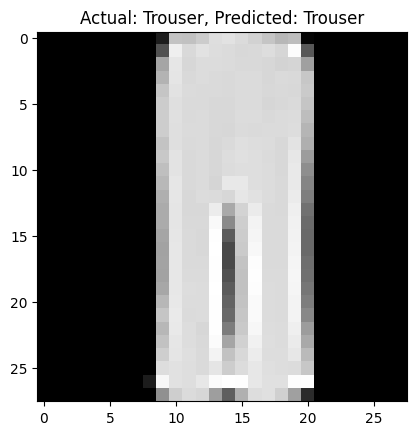

In [25]:
# Randomly select an item 
random_idx = np.random.randint(0, len(X_test))
random_image = X_test[random_idx]
random_label = y_test[random_idx]

# Predict the class 
prediction = model.predict(np.expand_dims(random_image, axis=0))
predicted_class = np.argmax(prediction)

print(f"Actual label: {class_names[random_label]}")
print(f"Predicted label: {class_names[predicted_class]}")

# Plot 
plt.imshow(random_image.squeeze(), cmap='gray')
plt.title(f"Actual: {class_names[random_label]}, Predicted: {class_names[predicted_class]}")
plt.show()

In [26]:
#comparision

print(test_acc-test_acc_gcnn)
print(test_acc-test_acc_resnet) 
print(test_acc-test_acc_alexnet) 
print(test_acc-test_acc_lenet) 

-0.0015000104904174805
-0.02060002088546753
0.013300001621246338
0.02120000123977661


In [27]:
print("Test Accuracy of our model ", test_acc)
print("Test Accuracy of General CNN ", test_acc_gcnn)
print("Test Accuracy of ResNet ", test_acc_resnet) #highest accuracy
print("Test Accuracy of AlexNet ", test_acc_alexnet)
print("Test Accuracy of LeNet ", test_acc_lenet)

Test Accuracy of our model  0.885699987411499
Test Accuracy of General CNN  0.8871999979019165
Test Accuracy of ResNet  0.9063000082969666
Test Accuracy of AlexNet  0.8723999857902527
Test Accuracy of LeNet  0.8644999861717224


In [28]:
print("Precision of our model ", precision) #highest precision
print("Precision of General CNN ", precision_gcnn)
print("Precision of ResNet ", precision_resnet)
print("Precision of AlexNet ", precision_alexnet)
print("Precision of LeNet ", precision_lenet)


Precision of our model  0.98165035
Precision of General CNN  0.9815699
Precision of ResNet  0.9892171
Precision of AlexNet  0.9849506
Precision of LeNet  0.98318195


In [29]:
print("Recall of our model ", recall) 
print("Recall of General CNN ", recall_gcnn)
print("Recall of ResNet ", recall_resnet) #highest recall
print("Recall of AlexNet ", recall_alexnet)
print("Recall of LeNet ", recall_lenet)

Recall of our model  0.9807778
Recall of General CNN  0.98233336
Recall of ResNet  0.97855556
Recall of AlexNet  0.97444445
Recall of LeNet  0.97433335
